In [1]:
import os
import sys
import sys
sys.path.append("..")
from utils.model_func import load_config
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# silent warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
#Yellow Taxi Data
df_yellow = []
base = "../../../Data/yellow/{}/yellow_tripdata_{}-{}.csv"
base_lookup = "../../../Data/Taxi Zone Maps and Lookup Tables/taxi_zone_lookupv1.csv"

In [202]:
base

'../../../Data/yellow/{}/yellow_tripdata_{}-{}.csv'

In [4]:
df_yellow = []

yrs = [(2024, 4), (2023, 6), (2022, 6), (2021, 6), (2020, 6)]


for yr, mth in yrs:
    y2024 = []
    print(yr)
    for i in range(1, mth+1):

        df = pd.read_csv(base.format(yr, yr, str(i).zfill(2)))
        # take 50% of the data
        df = df.sample(frac=0.5)
        print(f"\t{yr}-{i}-{df.shape}")
        print(f"\t\t{list(df.columns)}")
        y2024.append(df)
        df = None
    df_yellow.append(pd.concat(y2024))
    # clear buffer
    y2024 = []
    # clear stdout
    sys.stdout.flush()

2024
	2024-1-(1482312, 19)
		['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
	2024-2-(1503763, 19)
		['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
	2024-3-(1791314, 19)
		['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge

In [5]:
df = pd.concat([_.sample(frac=0.3) for _ in df_yellow])

In [6]:
date_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

date_cols_rename = ['pickup_datetime', 'dropoff_datetime', ]
df.rename(columns={k: v for k, v in zip(date_cols, date_cols_rename)}, inplace=True)

new_cols = ['pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time']

for col, new_col in zip(date_cols_rename, new_cols):
    df[new_col] = df[col].dt.date if 'date' in new_col else df[col].dt.time

new_name = ['pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12211171 entries, 2495357 to 5349047
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   pickup_datetime        datetime64[ns]
 2   dropoff_datetime       datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           float64       
 8   DOLocationID           float64       
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee         

In [7]:
df.reset_index(drop=True, inplace=True)
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee,pickup_date,pickup_time
0,2.0,2024-02-26 23:00:17,2024-02-26 23:18:51,1.0,5.09,1.0,N,158.0,232.0,1.0,...,0.5,4.46,0.0,1.0,34.16,2.5,0.0,NaN,2024-02-26,23:18:51
1,1.0,2024-01-01 02:28:56,2024-01-01 02:48:41,1.0,5.00,1.0,N,24.0,243.0,1.0,...,0.5,8.35,0.0,1.0,36.25,0.0,0.0,NaN,2024-01-01,02:48:41
2,2.0,2024-01-06 18:09:08,2024-01-06 18:19:11,2.0,0.94,1.0,N,230.0,100.0,1.0,...,0.5,2.80,0.0,1.0,16.80,2.5,0.0,NaN,2024-01-06,18:19:11
3,2.0,2024-03-23 03:29:45,2024-03-23 03:35:19,1.0,1.01,1.0,N,114.0,107.0,1.0,...,0.5,2.58,0.0,1.0,15.48,2.5,0.0,NaN,2024-03-23,03:35:19
4,1.0,2024-03-22 15:46:33,2024-03-22 17:23:37,1.0,9.80,99.0,N,39.0,68.0,1.0,...,0.5,0.00,0.0,1.0,42.00,0.0,0.0,NaN,2024-03-22,17:23:37


In [209]:
def check_unique(d):
    for c in d.columns:
        print(f"{c}: {d[c].nunique()}")
def check_missing(d):
    for c in d.columns:
        print(f"{c}: {d[c].isnull().sum()} ({d[c].isnull().sum()/d.shape[0] * 100:.2f}%)")

def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'
    
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'
    
def get_data_path(conf_path):
    # Load configuration
    FARE_AMOUNT = load_config(conf_path)['FARE_AMOUNT-MODEL1']
    return FARE_AMOUNT["DATA_PATH"]

def save_data_and_desc(data, target, config_path):
    # Load configuration
    print("-----testing here---")
    config_DATA_PTH = get_data_path(config_path)

    # Create and save data description file
    features = data.drop(columns=[target]).columns.to_list()
    feat_target = {'features': features,
                'target': target}
    
    DESC = config_DATA_PTH["yellow"]["description"]
    feat_target_file = DESC.replace("models", "../")
    print(f"feat_target_file: {feat_target_file}")

    # Create and save data for model building
    YELLO_TAXI_DATA = config_DATA_PTH["yellow"]["path"]
    YELLO_TAXI_DATA = YELLO_TAXI_DATA.replace("models/ml/", "")
    file = YELLO_TAXI_DATA
    data_path = "/".join(YELLO_TAXI_DATA.split("/")[0:2])

    os.makedirs(data_path, exist_ok=True)
    try:
        with open(feat_target_file, 'w') as f:
            json.dump(feat_target, f)
        # data.to_csv(YELLO_TAXI_DATA, index=False)
    except Exception as e:
        print(f"Can't save file: {e}")

In [9]:
df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(exclude=['number'])
num_cols = df_num.columns.to_list()
non_num_cols = df_cat.columns.to_list()

print(f"All columns: {df.shape}")
print(f"Numerical columns: {df_num.shape}")
print(f"Non-numerical columns: {df_cat.shape}")

All columns: (12211171, 22)
Numerical columns: (12211171, 17)
Non-numerical columns: (12211171, 5)


### Process Numeric Cols

In [10]:
df_num.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,2.0,1.0,5.09,1.0,158.0,232.0,1.0,24.7,1.0,0.5,4.46,0.0,1.0,34.16,2.5,0.0,NaN
1,1.0,1.0,5.00,1.0,24.0,243.0,1.0,25.4,1.0,0.5,8.35,0.0,1.0,36.25,0.0,0.0,NaN
2,2.0,2.0,0.94,1.0,230.0,100.0,1.0,10.0,0.0,0.5,2.80,0.0,1.0,16.80,2.5,0.0,NaN
3,2.0,1.0,1.01,1.0,114.0,107.0,1.0,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.0,NaN
4,1.0,1.0,9.80,99.0,39.0,68.0,1.0,40.5,0.0,0.5,0.00,0.0,1.0,42.00,0.0,0.0,NaN


In [11]:
check_missing(df_num)

VendorID: 0 (0.00%)
passenger_count: 502515 (4.12%)
trip_distance: 0 (0.00%)
RatecodeID: 502515 (4.12%)
PULocationID: 0 (0.00%)
DOLocationID: 0 (0.00%)
payment_type: 0 (0.00%)
fare_amount: 0 (0.00%)
extra: 0 (0.00%)
mta_tax: 0 (0.00%)
tip_amount: 0 (0.00%)
tolls_amount: 0 (0.00%)
improvement_surcharge: 0 (0.00%)
total_amount: 0 (0.00%)
congestion_surcharge: 502515 (4.12%)
Airport_fee: 8028689 (65.75%)
airport_fee: 7793553 (63.82%)


In [12]:
cols_fill = ['passenger_count', 'congestion_surcharge']
cols_drop = ['Airport_fee', 'airport_fee']
cols_to_cat = ['VendorID', 'RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID']

df_num.drop([*cols_drop, *cols_to_cat], axis=1, inplace=True)

1. Negative values: trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, total_amountimprovement_surcharge	, congestion_surcharge

### Categorical

In [34]:
df_cat1 = df_cat.copy()
df_cat1.head()


,pickup_datetime,dropoff_datetime,store_and_fwd_flag,pickup_date,pickup_time
0,2024-02-26 23:00:17,2024-02-26 23:18:51,N,2024-02-26,23:18:51
1,2024-01-01 02:28:56,2024-01-01 02:48:41,N,2024-01-01,02:48:41
2,2024-01-06 18:09:08,2024-01-06 18:19:11,N,2024-01-06,18:19:11
3,2024-03-23 03:29:45,2024-03-23 03:35:19,N,2024-03-23,03:35:19
4,2024-03-22 15:46:33,2024-03-22 17:23:37,N,2024-03-22,17:23:37


In [35]:
# Add cols_to_cat
for col in cols_to_cat:
    try:
        df_cat1[col] = df[col].astype('int').astype('category')
    except :
        print(f"Error in {col}")
        print(df[col].value_counts())
        


# Create year, month, day, hour, minute, second, day of week, and week of year
df_cat1['p_year'] = df_cat['pickup_datetime'].dt.year
df_cat1['p_month'] = df_cat['pickup_datetime'].dt.month.astype('category')
df_cat1['p_week'] = df_cat['pickup_datetime'].dt.dayofweek.astype('category')
df_cat1['p_day'] = df_cat['pickup_datetime'].dt.day.astype('category')
df_cat1['p_hour'] = df_cat['pickup_datetime'].dt.hour
df_cat1['d_hour'] = df_cat['dropoff_datetime'].dt.hour
df_cat1['p_minute'] = df_cat['pickup_datetime'].dt.minute
df_cat1['d_minute'] = df_cat['dropoff_datetime'].dt.minute

df_cat1['p_day_part'] = df_cat1['p_hour'].apply(get_part_of_day).astype('category')
df_cat1['p_season'] = df_cat1['p_month'].apply(get_season).astype('category')

# travel time in minutes
df_cat1['travel_time'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.seconds / 60

#Drop datetime
df_cat1.drop(['pickup_datetime', 'dropoff_datetime', 'pickup_time', 'pickup_date', ], axis=1, inplace=True)


Error in RatecodeID
RatecodeID
1.0     11191994
2.0       359114
5.0        67122
99.0       44804
3.0        29012
4.0        16551
6.0           59
Name: count, dtype: int64


In [36]:
# # Check if p_year and d_year are the same for all records
# for col in [('p_hour', 'd_hour'), ('p_minute', 'd_minute')]:
#     tmp = def_cat1[col[0]] == def_cat1[col[1]]
#     print(col)
#     print(sum(tmp),"==", len(def_cat1),  sum(tmp) == len(def_cat1), (sum(tmp)/len(def_cat1)), " All equall: ", tmp.all())
#     if tmp.all():
        
#         print("All trips are within the same year. You can use a single 'year' column.")
#         def_cat1[col[0].split('_')[-1]] = def_cat1[col[0]]
#         def_cat1.drop(columns=[col[0], col[1]], inplace=True)
#     else:
#         print(f"\t{col}")
#         print(f"Some trips span different years. You can use both {col[0].split('_')[-1]} and {col[1].split('_')[-1]} columns.")

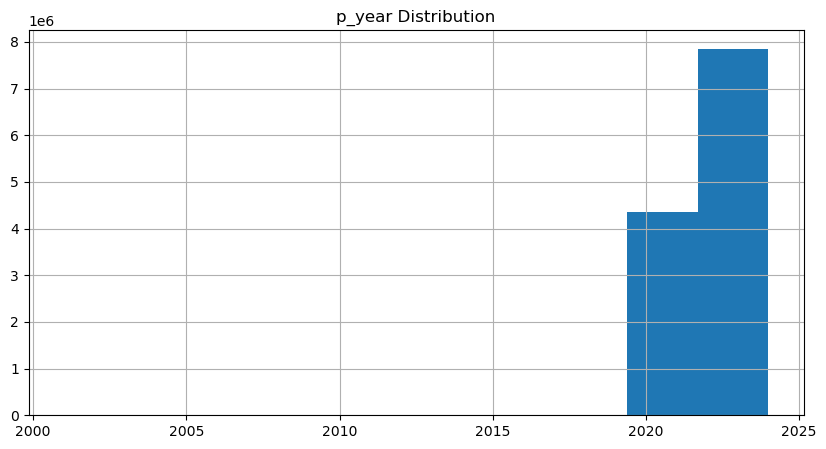

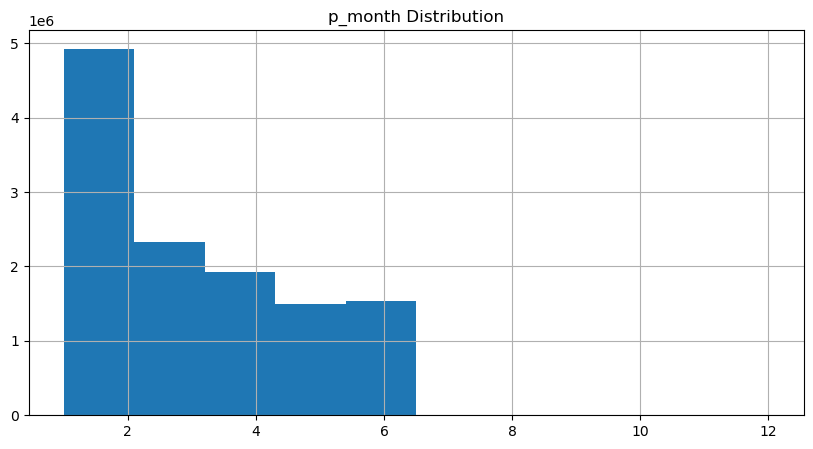

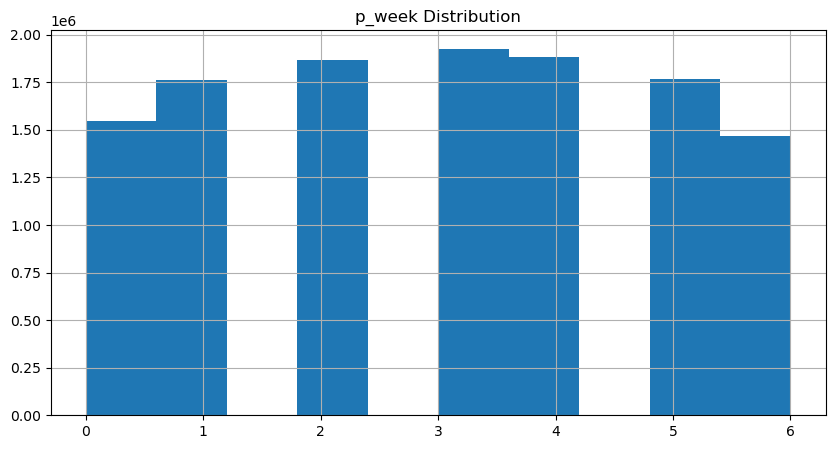

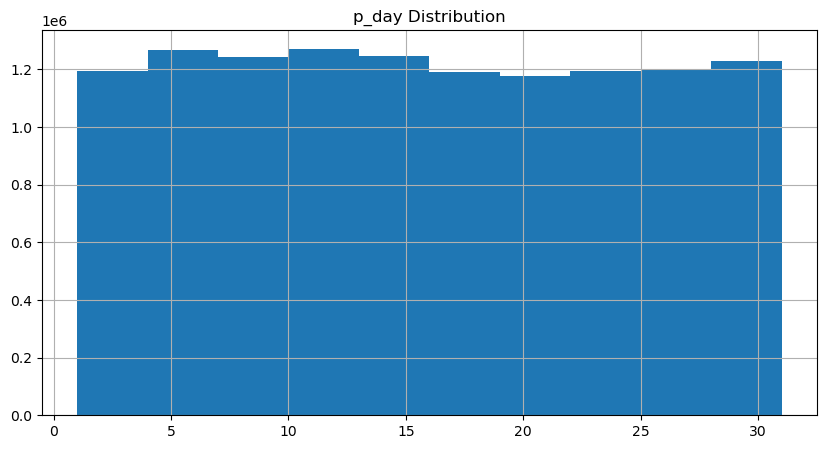

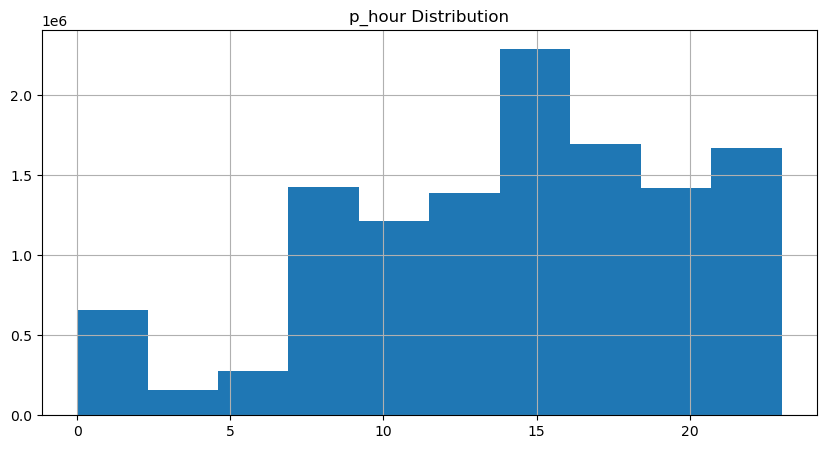

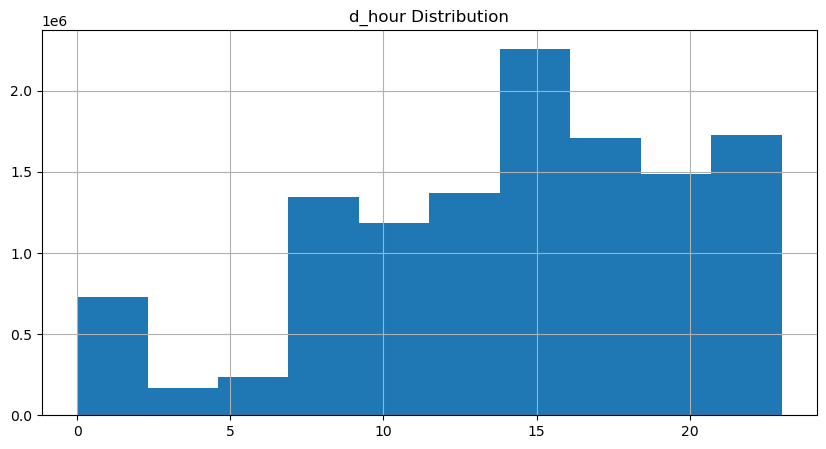

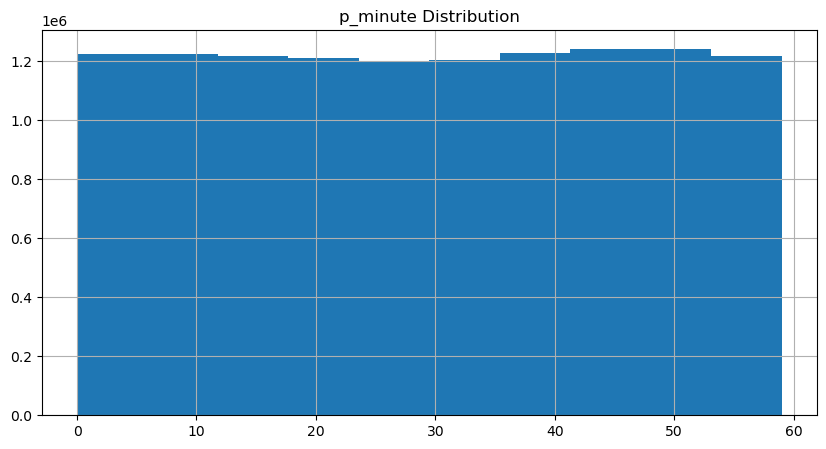

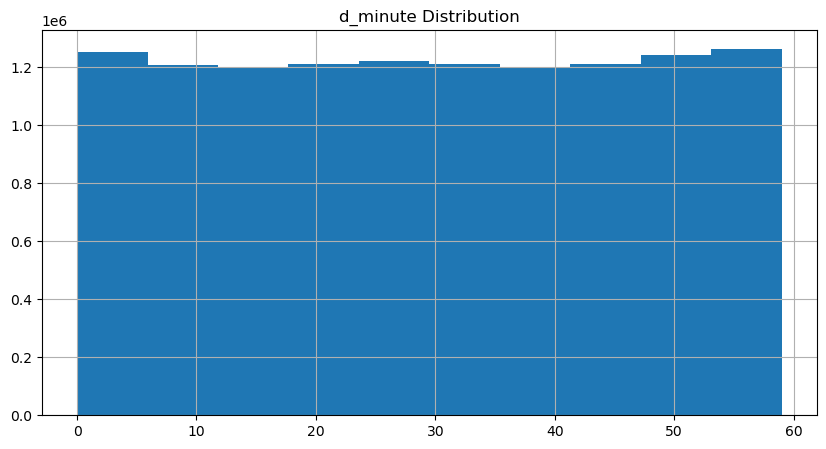

In [37]:
hist_cols = ['p_year', 'p_month', 'p_week', 'p_day', 'p_hour', 'd_hour', 'p_minute', 'd_minute']

for col in hist_cols:
    plt.figure(figsize=(10, 5))
    df_cat1[col].hist()
    plt.title(f"{col} Distribution")
    plt.show()


- p_year: Treated as numeric.
- p_month: Treated as categorical to capture seasonal patterns.
- p_week: Treated as categorical to capture weekly patterns.
- p_day: Treated as categorical to capture daily patterns.
- p_hour: Treated as numeric.
- d_hour: Treated as numeric.
- p_minute: Treated as numeric.
- d_minute: Treated as numeric.


In [38]:
# cols to numeric
cols_to_num = ['p_year', 'p_hour', 'd_hour', 'p_minute', 'd_minute', 'travel_time']
df_num1 = df_num.copy()
for col in cols_to_num:
    df_num1[col] = df_cat1[col].astype('int')
df_cat1.drop(columns=cols_to_num, inplace=True)

In [39]:
df_cat1.head()

,store_and_fwd_flag,VendorID,payment_type,PULocationID,DOLocationID,p_month,p_week,p_day,p_day_part,p_season
0,N,2,1,158,232,2,0,26,night,winter
1,N,1,1,24,243,1,0,1,night,winter
2,N,2,1,230,100,1,5,6,evening,winter
3,N,2,1,114,107,3,5,23,night,spring
4,N,1,1,39,68,3,4,22,afternoon,spring


In [40]:

for c in df_cat1.columns:
    if df_cat1[c].dtype != 'category':
       df_cat1[c] = df_cat1[c].astype('category')

In [134]:
# Merge df_num1 and df_cat1
dff = pd.concat([df_num1, df_cat1], axis=1)

In [135]:
dff.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,...,store_and_fwd_flag,VendorID,payment_type,PULocationID,DOLocationID,p_month,p_week,p_day,p_day_part,p_season
0,1.0,5.09,24.7,1.0,0.5,4.46,0.0,1.0,34.16,2.5,...,N,2,1,158,232,2,0,26,night,winter
1,1.0,5.00,25.4,1.0,0.5,8.35,0.0,1.0,36.25,0.0,...,N,1,1,24,243,1,0,1,night,winter
2,2.0,0.94,10.0,0.0,0.5,2.80,0.0,1.0,16.80,2.5,...,N,2,1,230,100,1,5,6,evening,winter
3,1.0,1.01,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,...,N,2,1,114,107,3,5,23,night,spring
4,1.0,9.80,40.5,0.0,0.5,0.00,0.0,1.0,42.00,0.0,...,N,1,1,39,68,3,4,22,afternoon,spring


In [136]:
# Check for missing values
missing_v = []
err = []
x = len(dff)
for c in dff.columns:
    try:
        if sum(dff[c].isna()):
            missing_v.append(c)
        print(f"Missing values in {c} [{(dff[c].isna().sum()/x)*100}%]")
    except TypeError:
        err.append(c)

Missing values in passenger_count [4.115207296663031%]
Missing values in trip_distance [0.0%]
Missing values in fare_amount [0.0%]
Missing values in extra [0.0%]
Missing values in mta_tax [0.0%]
Missing values in tip_amount [0.0%]
Missing values in tolls_amount [0.0%]
Missing values in improvement_surcharge [0.0%]
Missing values in total_amount [0.0%]
Missing values in congestion_surcharge [4.115207296663031%]
Missing values in p_year [0.0%]
Missing values in p_hour [0.0%]
Missing values in d_hour [0.0%]
Missing values in p_minute [0.0%]
Missing values in d_minute [0.0%]
Missing values in travel_time [0.0%]
Missing values in store_and_fwd_flag [4.115207296663031%]
Missing values in VendorID [0.0%]
Missing values in payment_type [0.0%]
Missing values in PULocationID [0.0%]
Missing values in DOLocationID [0.0%]
Missing values in p_month [0.0%]
Missing values in p_week [0.0%]
Missing values in p_day [0.0%]
Missing values in p_day_part [0.0%]
Missing values in p_season [0.0%]


In [137]:
err

[]

In [138]:
# Drop rows with any missing values
dff = dff.dropna()

In [139]:

for c in dff.columns:
    try:
        if sum(dff[c].isna()):
            missing_v.append(c)
        print(f"Missing values in {c} [{(dff[c].isna().sum()/x)*100}%]")
    except TypeError:
        print(c)




Missing values in passenger_count [0.0%]
Missing values in trip_distance [0.0%]
Missing values in fare_amount [0.0%]
Missing values in extra [0.0%]
Missing values in mta_tax [0.0%]
Missing values in tip_amount [0.0%]
Missing values in tolls_amount [0.0%]
Missing values in improvement_surcharge [0.0%]
Missing values in total_amount [0.0%]
Missing values in congestion_surcharge [0.0%]
Missing values in p_year [0.0%]
Missing values in p_hour [0.0%]
Missing values in d_hour [0.0%]
Missing values in p_minute [0.0%]
Missing values in d_minute [0.0%]
Missing values in travel_time [0.0%]
Missing values in store_and_fwd_flag [0.0%]
Missing values in VendorID [0.0%]
Missing values in payment_type [0.0%]
Missing values in PULocationID [0.0%]
Missing values in DOLocationID [0.0%]
Missing values in p_month [0.0%]
Missing values in p_week [0.0%]
Missing values in p_day [0.0%]
Missing values in p_day_part [0.0%]
Missing values in p_season [0.0%]


<Axes: >

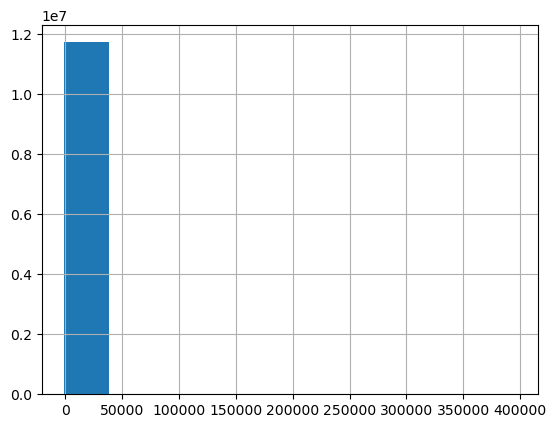

In [100]:
dff['fare_amount'].hist()

In [140]:
len(dff[dff['fare_amount'] < 0]), len(dff[dff['fare_amount'] > 50000])

(82841, 1)

In [142]:
# Drop rows with negative fare_amount and those greater than 50000
dff = dff[dff['fare_amount'] > 0]
dff = dff[dff['fare_amount'] < 50000]

num_cols = df_num1.columns.to_list()
cat_cols = df_cat1.columns.to_list()
xx = 0
for c in num_cols:
    s_ = (dff[c] < 0).sum()
    print(f"{c}: {s_}[{(s_/x)*100}%]")
    xx += s_

print(f"{xx}: [{(xx/x)*100}% data have negative values]")



passenger_count: 0[0.0%]
trip_distance: 4[3.2756891210515355e-05%]
fare_amount: 0[0.0%]
extra: 9[7.370300522365955e-05%]
mta_tax: 0[0.0%]
tip_amount: 0[0.0%]
tolls_amount: 0[0.0%]
improvement_surcharge: 0[0.0%]
total_amount: 0[0.0%]
congestion_surcharge: 0[0.0%]
p_year: 0[0.0%]
p_hour: 0[0.0%]
d_hour: 0[0.0%]
p_minute: 0[0.0%]
d_minute: 0[0.0%]
travel_time: 0[0.0%]
13: [0.0001064598964341749% data have negative values]


In [143]:
# Drop rows with negative trip_distance, extra
dff = dff[dff['trip_distance'] > 0]
dff = dff[dff['extra'] > 0]

In [144]:
x = len(dff)
xx = 0
for c in num_cols:
    s_ = (dff[c] < 0).sum()
    print(f"{c}: {s_}[{(s_/x)*100}%]")
    xx += s_

print(f"{xx}: [{(xx/x)*100}% data have negative values]")

passenger_count: 0[0.0%]
trip_distance: 0[0.0%]
fare_amount: 0[0.0%]
extra: 0[0.0%]
mta_tax: 0[0.0%]
tip_amount: 0[0.0%]
tolls_amount: 0[0.0%]
improvement_surcharge: 0[0.0%]
total_amount: 0[0.0%]
congestion_surcharge: 0[0.0%]
p_year: 0[0.0%]
p_hour: 0[0.0%]
d_hour: 0[0.0%]
p_minute: 0[0.0%]
d_minute: 0[0.0%]
travel_time: 0[0.0%]
0: [0.0% data have negative values]


In [29]:
# for c in num_cols:
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
#     # Regular histogram
#     ax1.hist(dff[c], bins='auto')
#     ax1.set_title(f'Regular Histogram of {c}')
#     ax1.set_xlabel(c)
#     ax1.set_ylabel('Frequency')
#     ax1.grid(True, alpha=0.2)
    
#     # Log Y-scale histogram
#     ax2.hist(dff[c], bins='auto')
#     ax2.set_yscale('log')
#     ax2.set_xscale('log')
#     ax2.set_title(f'Histogram of {c} (Log Y Scale)')
#     ax2.set_xlabel(c)
#     ax2.set_ylabel('Frequency (log scale)')
#     ax2.grid(True, which="both", ls="-", alpha=0.2)
    
#     plt.tight_layout()
#     print(f"[{c}] min: {dff[c].min()}, max: {dff[c].max()}")
#     plt.show()


In [108]:
dff.head()


,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,...,store_and_fwd_flag,VendorID,payment_type,PULocationID,DOLocationID,p_month,p_week,p_day,p_day_part,p_season
0,1.0,5.09,24.7,1.0,0.5,4.46,0.0,1.0,34.16,2.5,...,N,2,1,158,232,2,0,26,night,winter
1,1.0,5.00,25.4,1.0,0.5,8.35,0.0,1.0,36.25,0.0,...,N,1,1,24,243,1,0,1,night,winter
3,1.0,1.01,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,...,N,2,1,114,107,3,5,23,night,spring
5,1.0,1.10,12.1,2.5,0.5,0.00,0.0,1.0,16.10,2.5,...,N,1,3,186,90,2,3,1,morning,winter
9,2.0,7.47,36.6,1.0,0.5,0.00,0.0,1.0,41.60,2.5,...,N,2,2,13,166,3,2,27,night,spring


In [145]:
int_cols = [
    'p_year',
    'passenger_count',
    'p_hour',
    'd_hour',
    'p_minute',
    'd_minute',
    'travel_time'
]
# Columns to convert to float64
float_cols = [
    'trip_distance',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'total_amount',
    'congestion_surcharge',
    
]
# Convert integer columns to int64
for col in int_cols:
    dff[col] = dff[col].astype('int64')

# Convert float columns to float64
for col in float_cols:
    dff[col] = dff[col].astype('float64')



In [146]:
dropping = ['tolls_amount', 'total_amount']
for c in num_cols:
    print(f"{c}: {dff[c].unique()}, Len ==: {len(dff[c].unique())}")

passenger_count: [1 2 3 0 6 4 5 8 7 9], Len ==: 10
trip_distance: [ 5.09  5.    1.01 ... 86.8  48.47 50.35], Len ==: 4784
fare_amount: [ 24.7   25.4    7.9  ... 236.5    7.6  225.01], Len ==: 1479
extra: [1.000e+00 2.500e+00 3.500e+00 5.000e+00 6.750e+00 6.000e+00 1.750e+00
 4.250e+00 7.500e+00 1.025e+01 9.250e+00 2.750e+00 8.500e+00 1.000e+01
 7.750e+00 1.175e+01 1.970e+00 1.000e-02 2.300e+00 3.200e+00 5.250e+00
 3.050e+00 4.000e-02 3.250e+00 3.000e+00 1.250e+01 7.250e+00 8.000e-02
 1.500e+00 8.200e+00 7.500e-01 2.500e-01 1.010e+00 2.720e+00 2.250e+00
 7.000e-01 5.000e-02 9.470e+00 1.425e+01 1.030e+00 5.000e-01 3.750e+00
 8.750e+00 6.250e+00 9.750e+00 1.250e+00 1.125e+01 2.000e-02 4.750e+00
 4.500e+00 5.500e+00 5.300e+00 3.000e-02 1.200e-01 2.450e+00 8.970e+00
 5.750e+00 1.375e+01 3.700e+00 6.000e-02 8.250e+00 9.638e+01 2.700e+00
 6.800e+00 4.000e+00 7.000e-02 1.275e+01 1.100e-01 1.020e+00 7.000e+00
 1.800e+00 4.300e+00 8.000e-01 3.350e+01 3.300e+00 2.510e+00 3.800e+00
 9.050e+00 6.55

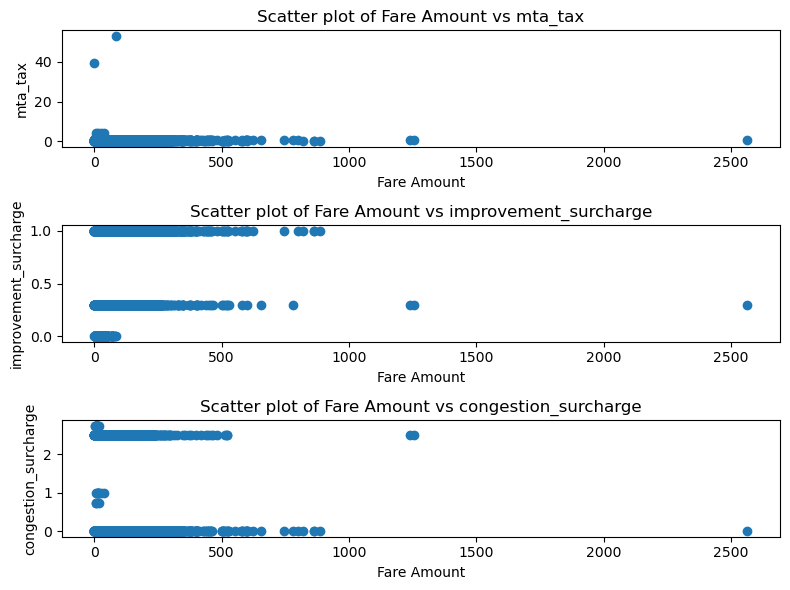

In [111]:
# Columns to convert to categorical
check = ['mta_tax', 'improvement_surcharge', 'congestion_surcharge']

fig, axs = plt.subplots(nrows=len(check), figsize=(8, 6))

for i, c in enumerate(check):
    axs[i].scatter(dff['fare_amount'], dff[c])
    axs[i].set_xlabel('Fare Amount')
    axs[i].set_ylabel(c)
    axs[i].set_title(f'Scatter plot of Fare Amount vs {c}')

plt.tight_layout()
plt.show()


In [147]:
dff[dff['fare_amount'] > 1000]

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,...,store_and_fwd_flag,VendorID,payment_type,PULocationID,DOLocationID,p_month,p_week,p_day,p_day_part,p_season
5040777,1,266.20,1256.5,0.5,0.5,0.0,40.0,0.3,1301.55,2.5,...,N,2,2,138,265,4,3,7,night,spring
5937326,1,68.07,2564.0,3.0,0.5,0.0,0.0,0.3,2567.80,0.0,...,N,2,2,193,193,4,1,19,afternoon,spring
10717228,1,8.27,1238.0,1.0,0.5,0.0,0.0,0.3,1242.30,2.5,...,N,2,2,186,152,1,4,3,evening,winter


In [113]:
dff.shape

(7025142, 26)

In [211]:
# Data and its details
CONFIG_PATH = '../utils/config/ml_config.json'

save_data_and_desc(dff, 'fare_amount', CONFIG_PATH)

-----testing here---
feat_target_file: ..//utils/config/feat_target.json


In [114]:
# Encode categorical
dff = pd.get_dummies(dff, columns=cat_cols)

In [115]:
dff.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,...,p_day_30,p_day_31,p_day_part_afternoon,p_day_part_evening,p_day_part_morning,p_day_part_night,p_season_fall,p_season_spring,p_season_summer,p_season_winter
0,1,5.09,24.7,1.0,0.5,4.46,0.0,1.0,34.16,2.5,...,False,False,False,False,False,True,False,False,False,True
1,1,5.00,25.4,1.0,0.5,8.35,0.0,1.0,36.25,0.0,...,False,False,False,False,False,True,False,False,False,True
3,1,1.01,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,...,False,False,False,False,False,True,False,True,False,False
5,1,1.10,12.1,2.5,0.5,0.00,0.0,1.0,16.10,2.5,...,False,False,False,False,True,False,False,False,False,True
9,2,7.47,36.6,1.0,0.5,0.00,0.0,1.0,41.60,2.5,...,False,False,False,False,False,True,False,True,False,False


In [5]:
df_tmp = pd.read_csv('Data/yellow/yellow_tripdata_all.csv')

In [6]:
df_tmp.shape

(7025142, 26)

In [7]:
# take 30% of the data
df_30 = df_tmp.sample(frac=0.3)



In [9]:
# save_data
df_30.to_csv('Data/yellow/yellow_tripdata_30.csv', index=False)

In [10]:
df_30

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,...,store_and_fwd_flag,VendorID,payment_type,PULocationID,DOLocationID,p_month,p_week,p_day,p_day_part,p_season
1609542,1,4.18,26.8,2.50,0.5,2.00,0.00,1.0,35.30,2.5,...,N,2,1,144,141,3,0,6,evening,spring
6527859,1,4.16,14.0,0.50,0.5,1.78,0.00,0.3,19.58,2.5,...,N,2,1,237,166,2,5,15,night,winter
3689832,3,0.78,6.5,1.00,0.5,1.00,0.00,0.3,11.80,2.5,...,N,2,1,142,230,4,3,14,evening,spring
6897136,2,2.06,13.0,0.50,0.5,4.20,0.00,0.3,21.00,2.5,...,N,2,1,234,100,2,4,7,night,winter
769154,1,1.20,9.3,2.50,0.5,2.26,0.00,1.0,15.56,2.5,...,N,1,1,263,237,3,6,17,morning,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428248,1,2.41,14.5,1.00,0.5,0.00,0.00,0.3,16.30,0.0,...,N,2,2,61,89,1,2,15,afternoon,winter
4300000,1,17.90,52.0,3.75,0.5,1.00,6.55,0.3,64.10,2.5,...,N,1,1,132,229,5,0,30,morning,spring
4879083,6,1.78,8.5,1.00,0.5,2.56,0.00,0.3,15.36,2.5,...,N,2,1,162,230,1,4,8,evening,winter
1079460,2,2.00,19.8,2.50,0.5,4.76,0.00,1.0,28.56,2.5,...,N,1,1,237,234,6,0,5,afternoon,summer
